In [23]:
import sys
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np
import netCDF4 as nc
from scipy.interpolate import griddata

import matplotlib.pyplot as plt

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

In [21]:
%matplotlib inline

### BC land mask

In [4]:
with h5py.File(PRISM_dir+'PRISM_regrid_BC_clim.hdf', 'r') as h_io:
    land_mask_BC = h_io['land_mask'][...]
    lon_BC = h_io['lon_4km'][...]
    lat_BC = h_io['lat_4km'][...]
    
with h5py.File(PRISM_dir+'PRISM_regrid_clim.hdf', 'r') as h_io:
    land_mask_US = h_io['land_mask'][...]
    lon_US = h_io['lon_4km'][...]
    lat_US = h_io['lat_4km'][...]

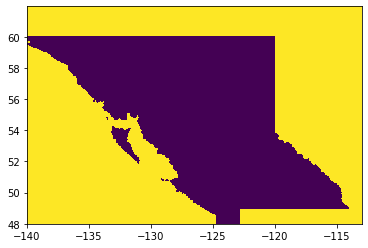

In [28]:
plt.pcolormesh(lon_BC, lat_BC, land_mask_BC)

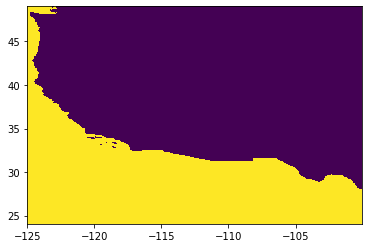

In [31]:
plt.pcolormesh(lon_US, lat_US, land_mask_US)

In [32]:
lonlim = [lon_BC.min(), lon_US.max()]
latlim = [lat_US.min(), lat_BC.max()]

dx_4km = 0.0416666666666
dy_4km = 0.0416666666666
lon_4km, lat_4km = np.meshgrid(np.arange(lonlim[0], lonlim[1]+dx_4km, dx_4km), np.arange(latlim[0], latlim[1]+dy_4km, dy_4km))

In [36]:
new_mask_BC = griddata((lon_BC.ravel(), lat_BC.ravel()), land_mask_BC.ravel(), (lon_4km, lat_4km), method='linear')
new_mask_US = griddata((lon_US.ravel(), lat_US.ravel()), land_mask_US.ravel(), (lon_4km, lat_4km), method='linear')

In [43]:
land_mask = np.ones(lon_4km.shape)
land_mask[new_mask_BC==0]=0
land_mask[new_mask_US==0]=0

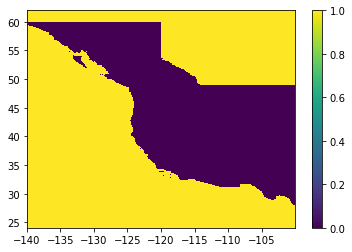

In [44]:
plt.pcolormesh(lon_4km, lat_4km, land_mask)
plt.colorbar()